In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from sklearn.preprocessing import MinMaxScaler
import imageio

plt.style.use('dark_background')

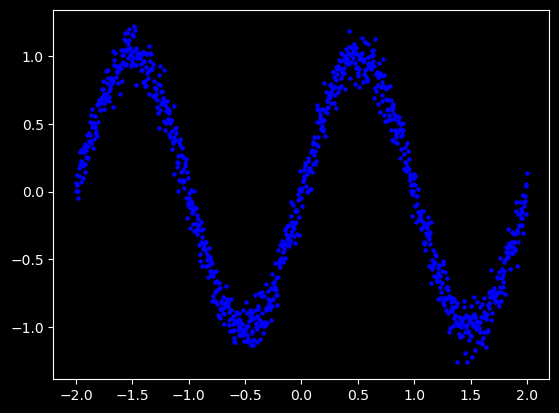

In [2]:
# ==========================
# 1. Data Generation
# ==========================

nPts = 1000

x = np.linspace(-2, 2, nPts)
X = x[:, np.newaxis]

# linear data
#m = 1
#b = 0
#y = m*x + b + np.random.normal(0, 0.1, nPts)

# sin data
y = np.sin(2*np.pi*x/2) + np.random.normal(0, 0.1, nPts)

# smoothe random data
#window = 50
#y = pd.Series(np.random.randn(nPts+window-1)).cumsum().rolling(window=window).mean().dropna()
#y = y / y.abs().mean()
#y = y.values + np.random.randn(nPts) * 0.05

plt.scatter(x, y, c='b', s=5)
plt.show()

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.4826  
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3736 
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3146 
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2590 
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2152 
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1794 
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1495 
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1328 
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1154 
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1223 
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1080 
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1072 
Epoch 13/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1029 
Epoch 14/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1059 
Epoch 15/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - l

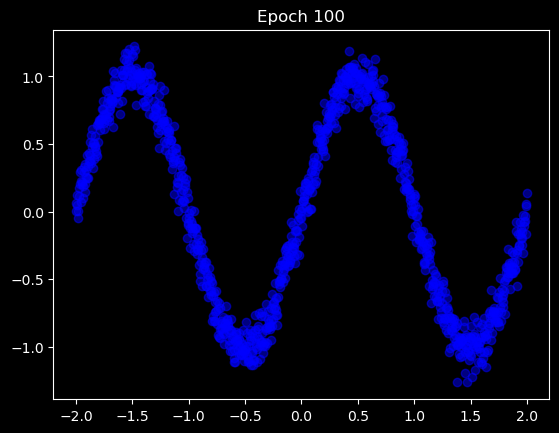

In [10]:
# ==========================
# 2. Model Definition
# ==========================

model = Sequential([
    Input(shape=X.shape[1:]),
    Dense(30, activation='relu'),
    Dense(20, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='linear'),
])

# Compile model with custom learning rate
learning_rate = 0.002
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    loss='mse'
)

# ==========================
# 3. Training with Animation
# ==========================

# Store predictions at each epoch
predictions_per_epoch = []

class EpochCallback(tf.keras.callbacks.Callback):
    """Custom Keras callback to save predictions after each epoch."""
    def on_epoch_end(self, epoch, logs=None):
        y_pred = model.predict(X, verbose=0)
        predictions_per_epoch.append(y_pred.flatten())

# Train model while collecting predictions
epochs=100
model.fit(
    X, y,
    epochs=epochs,
    batch_size=64,
    verbose=1,
    callbacks=[EpochCallback()]
)

# ==========================
# 4. Animation & Saving GIF
# ==========================

fig, ax = plt.subplots()
ax.scatter(x, y, color='b', label='True Values', alpha=0.5)
line, = ax.plot([], [], 'r', lw=2, label='Model Prediction')

def init():
    """Initialize the plot."""
    line.set_data([], [])
    return line,

def update(epoch):
    """Update the plot for each epoch."""
    y_pred = predictions_per_epoch[epoch]
    line.set_data(x, y_pred)
    ax.set_title(f'Epoch {epoch+1}')
    print(f"Epoch {epoch+1}/{epochs}", end="\r", flush=True)
    return line,

ani = animation.FuncAnimation(fig, update, frames=epochs, init_func=init, blit=False)

# Save animation as a GIF
gif_filename = "regression_training.gif"
ani.save(gif_filename, writer='pillow', fps=5)

print("done")